Yahoo Finance is the main data source.
https://pypi.org/project/yfinance/ 
Or you can use your choice of data provider


# Download Data

[Yahoo Finance](https://pypi.org/project/yfinance/) is one of the most popular data sources.  
Or you can use your choice of data provider

**Data Frame**
2 dimensional labeled data table in the Pandas library for Python.

In [8]:
import yfinance as yf
from datetime import date

def download_data(symbol, period, interval):
    tickerData = yf.Ticker(symbol)
    tickerDf = tickerData.history(
        period=period,
        interval=interval,
    )
    tickerDf = tickerDf[tickerDf.High != tickerDf.Low]
    tickerDf.to_csv(f"../data/{symbol.lower()}-{period}-{interval}.csv")
    return tickerDf

symbol = '^IXIC'
period = '1y'
interval = '1h'
tradingData = download_data(symbol, period, interval)
tradingData

Open          High           Low  \
Datetime                                                              
2023-04-25 11:30:00-04:00  11930.925781  11930.925781  11892.834961   
2023-04-25 12:30:00-04:00  11893.890625  11900.666992  11842.454102   
2023-04-25 13:30:00-04:00  11862.315430  11864.176758  11822.761719   
2023-04-25 14:30:00-04:00  11842.570312  11854.994141  11827.439453   
2023-04-25 15:30:00-04:00  11830.272461  11841.526367  11798.982422   
...                                 ...           ...           ...   
2024-04-24 14:30:00-04:00  15693.423828  15726.458984  15662.656250   
2024-04-24 15:30:00-04:00  15716.022461  15731.038086  15707.985352   
2024-04-25 09:30:00-04:00  15379.724609  15503.274414  15346.181641   
2024-04-25 10:30:00-04:00  15494.054688  15498.080078  15416.459961   
2024-04-25 11:30:00-04:00  15466.553711  15491.825195  15432.965820   

                                  Close      Volume  Dividends  Stock Splits  
Datetime                                                                      
2023-04-25 11:30:00-04:00  11894.381836           0        0.0           0.0  
2023-04-25 12:30:00-04:00  11862.843750   434447000        0.0           0.0  
2023-04-25 13:30:00-04:00  11843.119141   386835000        0.0           0.0  
2023-04-25 14:30:00-04:00  11830.783203   427345000        0.0           0.0  
2023-04-25 15:30:00-04:00  11800.601562   479935000        0.0           0.0  
...                                 ...         ...        ...           ...  
2024-04-24 14:30:00-04:00  15716.037109   386505000        0.0           0.0  
2024-04-24 15:30:00-04:00  15715.067383   416847000        0.0           0.0  
2024-04-25 09:30:00-04:00  15494.110352   972257417        0.0           0.0  
2024-04-25 10:30:00-04:00  15466.282227   588031000        0.0           0.0  
2024-04-25 11:30:00-04:00  15491.825195  2083883000        0.0           0.0  

[1757 rows x 7 columns]

# Pandas

- open source data analysis and manipulation tool, built on top of the Python programming language.
- https://pandas.pydata.org/ 

In [9]:
# Read data into pandas DataFrame
import pandas as pd

def read_data(symbol, period, interval):
    data = pd.read_csv(f'../data/{symbol}-{period}-{interval}.csv')
    data.Datetime = pd.to_datetime(data.Datetime, utc=True)
    data.set_index('Datetime', inplace=False)
    data.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
    return data


tradingData = read_data(symbol, period, interval)
tradingData

Datetime          Open          High           Low  \
0    2023-04-25 15:30:00+00:00  11930.925781  11930.925781  11892.834961   
1    2023-04-25 16:30:00+00:00  11893.890625  11900.666992  11842.454102   
2    2023-04-25 17:30:00+00:00  11862.315430  11864.176758  11822.761719   
3    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
4    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
...                        ...           ...           ...           ...   
1752 2024-04-24 18:30:00+00:00  15693.423828  15726.458984  15662.656250   
1753 2024-04-24 19:30:00+00:00  15716.022461  15731.038086  15707.985352   
1754 2024-04-25 13:30:00+00:00  15379.724609  15503.274414  15346.181641   
1755 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1756 2024-04-25 15:30:00+00:00  15466.553711  15491.825195  15432.965820   

             Close  
0     11894.381836  
1     11862.843750  
2     11843.119141  
3     11830.783203  
4     11800.601562  
...            ...  
1752  15716.037109  
1753  15715.067383  
1754  15494.110352  
1755  15466.282227  
1756  15491.825195  

[1757 rows x 5 columns]

**TA (Technical Analysis Library)**

- Technical Analysis library to financial time series datasets (open, close, high, low, volume)
- https://technical-analysis-library-in-python.readthedocs.io/en/latest/
- https://github.com/bukosabino/ta 


**Pandas TA**

- Pandas extension with TA library
- https://github.com/twopirllc/pandas-ta 


**loc**

- select and manipulate data, targeting rows and columns based on labels (index values or column names)


In [11]:
# Set MACD
import pandas_ta as ta

def set_macd(data):
    macd = ta.macd(data.Close)
    data['MACD'] = macd.loc[:, 'MACD_12_26_9']
    data['MACD_signal'] = macd.loc[:, 'MACDs_12_26_9']
    data['MACD_histogram'] = macd.loc[:, 'MACDh_12_26_9']

set_macd(tradingData)
tradingData

Datetime          Open          High           Low  \
0    2023-04-25 15:30:00+00:00  11930.925781  11930.925781  11892.834961   
1    2023-04-25 16:30:00+00:00  11893.890625  11900.666992  11842.454102   
2    2023-04-25 17:30:00+00:00  11862.315430  11864.176758  11822.761719   
3    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
4    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
...                        ...           ...           ...           ...   
1752 2024-04-24 18:30:00+00:00  15693.423828  15726.458984  15662.656250   
1753 2024-04-24 19:30:00+00:00  15716.022461  15731.038086  15707.985352   
1754 2024-04-25 13:30:00+00:00  15379.724609  15503.274414  15346.181641   
1755 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1756 2024-04-25 15:30:00+00:00  15466.553711  15491.825195  15432.965820   

             Close       MACD  MACD_signal  MACD_histogram  
0     11894.381836        NaN          NaN             NaN  
1     11862.843750        NaN          NaN             NaN  
2     11843.119141        NaN          NaN             NaN  
3     11830.783203        NaN          NaN             NaN  
4     11800.601562        NaN          NaN             NaN  
...            ...        ...          ...             ...  
1752  15716.037109  33.676616    14.418444       19.258171  
1753  15715.067383  34.360895    18.406934       15.953960  
1754  15494.110352  16.879232    18.101394       -1.222162  
1755  15466.282227   0.770509    14.635217      -13.864708  
1756  15491.825195  -9.821451     9.743883      -19.565334  

[1757 rows x 8 columns]

**tqdm**

- shows progress bar while applying the function to the given data frame
- taqaddum means "progress" in Arabic

**signal**

- 1 to buy, -1 to sell, and 0 to stay calm

In [13]:
# Set MACD Signal
from tqdm import tqdm
tqdm.pandas()

def macd_trade_signal(data, current):
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] <
            data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] >
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return 1
    if (
        all(data.loc[current - 3:current - 2, 'MACD'] >
            data.loc[current - 3:current - 2, 'MACD_signal']) and
        all(data.loc[current - 1:current, 'MACD'] <
            data.loc[current - 1:current, 'MACD_signal'])
    ):
        return -1
    return 0

def set_macd_trade_signal(data):
    data['MACD_trade_signal'] = data.progress_apply(
        lambda r: macd_trade_signal(data, r.name),
        axis='columns'
    )
    return data

set_macd_trade_signal(tradingData)
tradingData

100%|██████████| 1757/1757 [00:00<00:00, 5742.81it/s]


Datetime          Open          High           Low  \
0    2023-04-25 15:30:00+00:00  11930.925781  11930.925781  11892.834961   
1    2023-04-25 16:30:00+00:00  11893.890625  11900.666992  11842.454102   
2    2023-04-25 17:30:00+00:00  11862.315430  11864.176758  11822.761719   
3    2023-04-25 18:30:00+00:00  11842.570312  11854.994141  11827.439453   
4    2023-04-25 19:30:00+00:00  11830.272461  11841.526367  11798.982422   
...                        ...           ...           ...           ...   
1752 2024-04-24 18:30:00+00:00  15693.423828  15726.458984  15662.656250   
1753 2024-04-24 19:30:00+00:00  15716.022461  15731.038086  15707.985352   
1754 2024-04-25 13:30:00+00:00  15379.724609  15503.274414  15346.181641   
1755 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   
1756 2024-04-25 15:30:00+00:00  15466.553711  15491.825195  15432.965820   

             Close       MACD  MACD_signal  MACD_histogram  MACD_trade_signal  
0     11894.381836        NaN          NaN             NaN                  0  
1     11862.843750        NaN          NaN             NaN                  0  
2     11843.119141        NaN          NaN             NaN                  0  
3     11830.783203        NaN          NaN             NaN                  0  
4     11800.601562        NaN          NaN             NaN                  0  
...            ...        ...          ...             ...                ...  
1752  15716.037109  33.676616    14.418444       19.258171                  0  
1753  15715.067383  34.360895    18.406934       15.953960                  0  
1754  15494.110352  16.879232    18.101394       -1.222162                  0  
1755  15466.282227   0.770509    14.635217      -13.864708                 -1  
1756  15491.825195  -9.821451     9.743883      -19.565334                  0  

[1757 rows x 9 columns]

- Pass `total_trade_signal` function as parameter.
- Filter data frame with the given predicate condition

In [14]:
def total_trade_signal(row):
    if (row.MACD_trade_signal == 1):
        return 1
    elif (row.MACD_trade_signal == -1):
        return -1
    else:
        return 0

def set_total_trade_signal(data, total_trade_signal):
    data['Total_trade_signal'] = data.progress_apply(
        lambda r: total_trade_signal(r),
        axis='columns'
    )
    return data

set_total_trade_signal(tradingData, total_trade_signal)
print(f'number of trades: {tradingData[tradingData.Total_trade_signal != 0].shape[0]}')

tradingData[tradingData.Total_trade_signal != 0]


  0%|          | 0/1757 [00:00<?, ?it/s]

100%|██████████| 1757/1757 [00:00<00:00, 113121.18it/s]

number of trades: 127


Datetime          Open          High           Low  \
56   2023-05-05 15:30:00+00:00  12184.857422  12185.057617  12165.870117   
70   2023-05-09 15:30:00+00:00  12186.077148  12193.833008  12174.130859   
77   2023-05-10 15:30:00+00:00  12266.905273  12287.129883  12240.588867   
79   2023-05-10 17:30:00+00:00  12186.553711  12262.742188  12180.859375   
81   2023-05-10 19:30:00+00:00  12323.703125  12337.689453  12300.197266   
...                        ...           ...           ...           ...   
1695 2024-04-12 17:30:00+00:00  16145.599609  16189.479492  16136.209961   
1722 2024-04-18 16:30:00+00:00  15740.727539  15742.808594  15606.067383   
1724 2024-04-18 18:30:00+00:00  15620.649414  15639.794922  15587.633789   
1737 2024-04-22 17:30:00+00:00  15448.073242  15528.640625  15448.073242   
1755 2024-04-25 14:30:00+00:00  15494.054688  15498.080078  15416.459961   

             Close        MACD  MACD_signal  MACD_histogram  \
56    12170.349609    5.196058    -8.623057       13.819115   
70    12175.614258   32.046668    37.057744       -5.011076   
77    12262.987305   31.351271    29.821692        1.529579   
79    12252.806641   26.923419    28.668355       -1.744936   
81    12305.219727   35.611557    30.727395        4.884162   
...            ...         ...          ...             ...   
1695  16170.419922   -2.460695     9.791653      -12.252348   
1722  15647.046875 -105.598447  -106.054135        0.455688   
1724  15617.905273 -109.507376  -107.122602       -2.384773   
1737  15522.136719 -119.657220  -144.263172       24.605952   
1755  15466.282227    0.770509    14.635217      -13.864708   

      MACD_trade_signal  Total_trade_signal  
56                    1                   1  
70                   -1                  -1  
77                    1                   1  
79                   -1                  -1  
81                    1                   1  
...                 ...                 ...  
1695                 -1                  -1  
1722                  1                   1  
1724                 -1                  -1  
1737                  1                   1  
1755                 -1                  -1  

[127 rows x 10 columns]

**Backtesting**

- a Python framework for inferring viability of trading strategies on historical (past) data
- https://kernc.github.io/backtesting.py/

**ATR**

- Average True Range
- measures market volatility
- https://www.investopedia.com/terms/a/atr.asp


/var/folders/b9/tv8kqzz13cq_hsmncf9m9bs00000gp/T/ipykernel_62761/3333638871.py:44: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash,
/Users/youngho.chaa/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/11 [00:00<?, ?it/s]

Start                                     0.0
End                                    1756.0
Duration                               1756.0
Exposure Time [%]                     65.1679
Equity Final [$]                 32207.402117
Equity Peak [$]                  34216.978017
Return [%]                          28.829608
Buy & Hold Return [%]               30.244896
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -14.667545
Avg. Drawdown [%]                   -1.263612
Max. Drawdown Duration                  936.0
Avg. Drawdown Duration              33.659574
# Trades                                 62.0
Win Rate [%]                        37.096774
Best Trade [%]                       3.632565
Worst Trade [%]                     -2.275865
Avg. Trade [%]                    

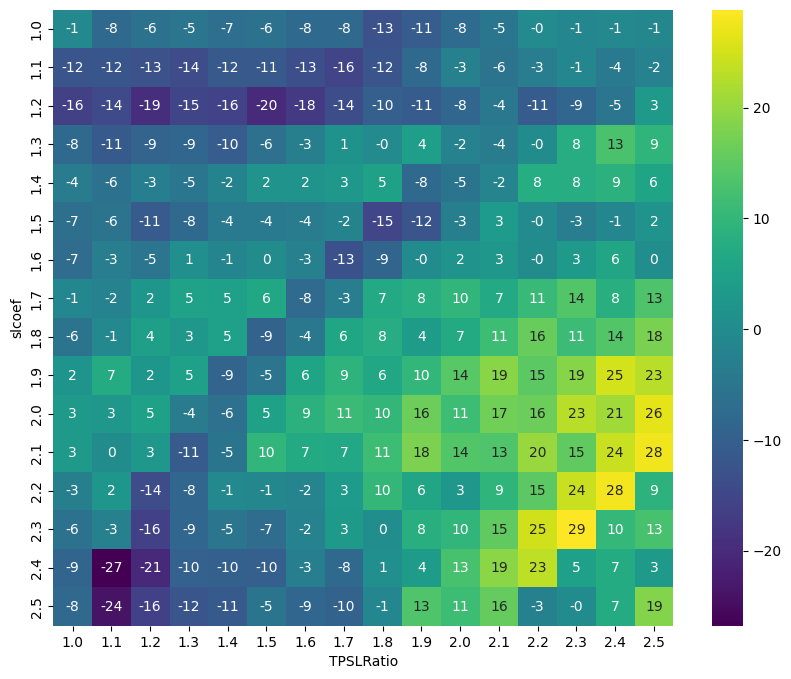

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from backtesting import Strategy
from backtesting import Backtest

def set_atr(data):
    data['ATR'] = ta.atr(data.High, data.Low, data.Close, length=7)
    return data


class MacdStrategy(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: self.data.Total_trade_signal)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if self.signal1 == 1 and len(self.trades) == 0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr * TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1 == -1 and len(self.trades) == 0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

def show_heatmap(heatmap):
    # Convert multiindex series to dataframe
    heatmap_dataFrame = heatmap.unstack()
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_dataFrame, annot=True, cmap='viridis', fmt='.0f')
    plt.show()


def backtest_trading(data, cash):
    backtest = Backtest(data, MacdStrategy, cash=cash,
                        margin=1/30, commission=0.00)
    stats, heatmap = backtest.optimize(slcoef=[i/10 for i in range(10, 26)],
                                       TPSLRatio=[i/10 for i in range(10, 26)],
                                       maximize='Return [%]', max_tries=300,
                                       random_state=0,
                                       return_heatmap=True)

    return stats, heatmap

set_atr(tradingData)
stats, heatmap = backtest_trading(tradingData, 25000)

print(stats)
show_heatmap(heatmap)

